# Customer Churn Prediction

In [5]:
# Importing Dependencies
import warnings
warnings.filterwarnings("ignore")

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading dataset
df = pd.read_excel("/config/workspace/Dataset/customer_churn_large_dataset.xlsx")

In [7]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [8]:
df.to_csv("/config/workspace/Dataset/customer_churn_large_dataset_csv.csv")

In [9]:
df = pd.read_csv("/config/workspace/Dataset/customer_churn_large_dataset_csv.csv")

In [10]:
df.head()

,Unnamed: 0,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [11]:
df.drop(labels=("Unnamed: 0"),axis = 1, inplace=True)

In [12]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [13]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [14]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [16]:
# Data Cleaning

In [17]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

- There is no missing value

In [18]:
# Dropping the unwanted column

df.drop(labels = ['CustomerID', 'Name'], axis = 1, inplace = True)

- CustomerID and Name feature is not related to churn so we can drop these unwanted column

In [19]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [20]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


In [21]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [22]:
# categories in Location
df.Location.value_counts()

Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: count, dtype: int64

<Axes: >

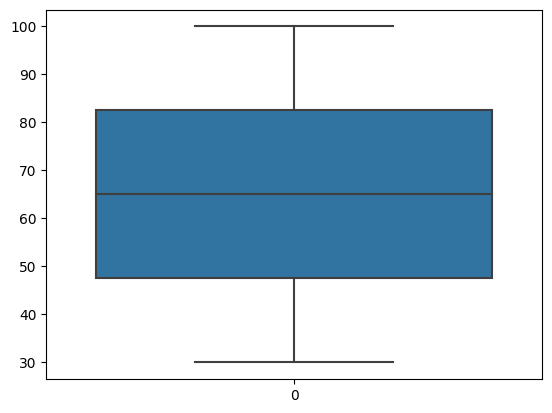

In [24]:
# Box Plot
sns.boxplot(df.Monthly_Bill)

<Axes: >

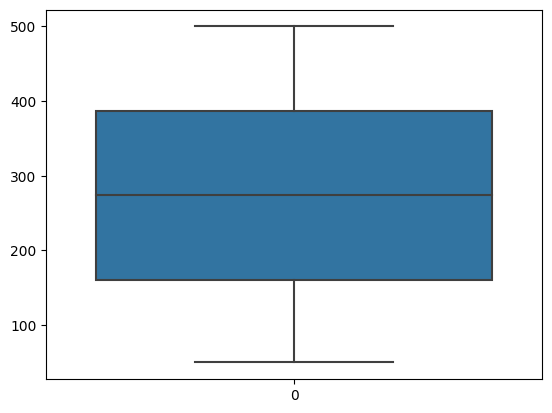

In [25]:
sns.boxplot(df.Total_Usage_GB)

- From above boxplot it's clear that there is no outlier

In [26]:
df.Churn.value_counts()

Churn
0    50221
1    49779
Name: count, dtype: int64

- Dataset is balance

In [27]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [28]:
# Splitting into Independent and dependent features

x = df.drop(labels=('Churn'),axis = 1)
y = df.Churn

In [29]:
x

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,Male,Los Angeles,17,73.36,236
1,62,Female,New York,1,48.76,172
2,24,Female,Los Angeles,5,85.47,460
3,36,Female,Miami,3,97.94,297
4,46,Female,Miami,19,58.14,266
...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226
99996,62,Female,New York,19,61.65,351
99997,64,Male,Chicago,17,96.11,251
99998,51,Female,New York,20,49.25,434


In [30]:
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

In [31]:
# Train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.40,
                                                 random_state=42)

In [32]:
x_train

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
40507,68,Female,Los Angeles,18,71.78,483
72707,70,Female,Houston,16,95.25,378
90912,50,Female,Houston,15,51.44,499
28532,25,Female,Chicago,21,72.91,433
13006,53,Female,New York,13,97.73,448
...,...,...,...,...,...,...
6265,35,Male,Miami,21,67.33,235
54886,56,Male,Chicago,13,85.40,347
76820,69,Male,Houston,2,76.24,321
860,55,Male,Chicago,12,89.19,315


In [33]:
from sklearn.impute import SimpleImputer # handing missing value
from sklearn.preprocessing import OneHotEncoder #handling categorical value
from sklearn.preprocessing import StandardScaler # Feature scaling

from sklearn.pipeline import Pipeline #automate the entire
from sklearn.compose import ColumnTransformer

In [34]:
x_test

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
75721,48,Female,Houston,11,88.48,492
80184,49,Male,New York,13,40.61,423
19864,31,Female,Los Angeles,5,33.01,276
76699,53,Male,New York,4,94.66,339
92991,23,Female,Los Angeles,24,82.21,304
...,...,...,...,...,...,...
84191,42,Female,Chicago,20,81.80,182
4373,44,Female,Chicago,5,77.09,450
57452,53,Female,Houston,14,54.34,168
31042,27,Female,Houston,9,51.33,165


In [35]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

In [36]:
categorical_cols = ['Gender', 'Location']
numerical_cols = ['Age', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB']

In [37]:
# feature Engineering automation
# numerical pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')), #missing value
        ('scaler',StandardScaler()) # feature scaling
    ]
)

# categorical pipeline
cat_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='most_frequent')), #handling missing value
        ('onehotencoder',OneHotEncoder()) #encoding
    ]

)

In [38]:
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
])

In [39]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [40]:
x_train

array([[ 1.5732167 ,  0.79782626,  0.33045706, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.70419885,  0.50890097,  1.49071244, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.39437741,  0.36443832, -0.67506464, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.63870778, -1.51357607,  0.55094019, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.72183277, -0.06894961,  1.19113223, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17740831,  0.65336362,  0.26273018, ...,  1.        ,
         0.        ,  0.        ]])

In [41]:
x_test

array([[ 0.26339527, -0.21341226,  1.1560329 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.32888634,  0.07551303, -1.21045305, ...,  0.        ,
         0.        ,  1.        ],
       [-0.84995295, -1.08018813, -1.5861642 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.59085063,  0.21997568, -0.53170118, ...,  0.        ,
         0.        ,  0.        ],
       [-1.11191724, -0.50233755, -0.68050257, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12955116, -1.22465078,  0.36703947, ...,  0.        ,
         0.        ,  0.        ]])

In [42]:
# pickling the preprocessor
import pickle
file = open('/config/workspace/Model/preprocessor.pkl','wb')
pickle.dump(preprocessor,file)
file.close()

In [43]:
# Model training

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
def evaluate_model(x_train,y_train,x_test,y_test,models):
    
    report = {}
    
    for i in range(len(models)):
        model = list(models.values())[i]
        
        # train model
        model.fit(x_train,y_train)
        
        #predict testing data
        y_test_pred = model.predict(x_test)
        
        # get accuracy for test data prediction
        test_model_score = accuracy_score(y_test,y_test_pred)
        
        report[list(models.keys())[i]] = test_model_score
        
    return report

In [46]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Naive Bayes': GaussianNB()
}

In [47]:
evaluate_model(x_train,y_train,x_test,y_test,models)

{'Random Forest': 0.4969,
 'Decision Tree': 0.49785,
 'Logistic Regression': 0.50325,
 'Naive Bayes': 0.505225}

In [48]:
# hyperparameter tunnig
classifier = RandomForestClassifier()

params = {'max_depth':[3,5,10,None],
          'n_estimators':[100,200,300],
          'criterion': ['gini','entropy','log_loss'],
         }

In [49]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(classifier, param_grid=params,scoring='accuracy',cv=5,verbose=3)

In [50]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.504 total time=   2.0s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.499 total time=   2.0s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.501 total time=   2.0s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.501 total time=   2.0s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.498 total time=   2.0s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.499 total time=   4.0s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.500 total time=   4.0s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.501 total time=   4.1s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.501 total time=   4.0s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.501 total time=   4.0s
[CV 1/5] END crite

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [51]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 300}

In [54]:
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.50035

In [57]:
# Final Model
model = RandomForestClassifier(criterion='entropy', max_depth= 3, n_estimators=300)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=300)

In [53]:
# pickling the model
file = open('/config/workspace/Model/model.pkl','wb')
pickle.dump(model,file)
file.close()